Multi agent Deep Deterministic Policy Gradient

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

sub_folder = '../code/model_metric_data/ddpg'
# sub_folder = '../code/model_metric_data/ddpg/pretrained'
# sub_folder = '../trained/continous/ddpg'

model_folder = f'{sub_folder}/1000ep_2rf_20rps5.0alpha_50scale1000resources'
ep_summed_rewards_df = pd.read_csv(f'{model_folder}/ep_summed_rewards.csv')
ep_latencies_df = pd.read_csv(f'{model_folder}/ep_latencies.csv')
# resource_dev_df = pd.read_csv(f'{model_folder}/resource_dev.csv')

num_agents = 3
agent_ep_summed_rewards = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_summed_rewards.csv'
    agent_rewards_df = pd.read_csv(filename)
    agent_ep_summed_rewards.append(agent_rewards_df)

In [4]:
agents_mean_latenices = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_mean_latencies.csv'
    agent_latencies_df = pd.read_csv(filename)
    agents_mean_latenices.append(agent_latencies_df)

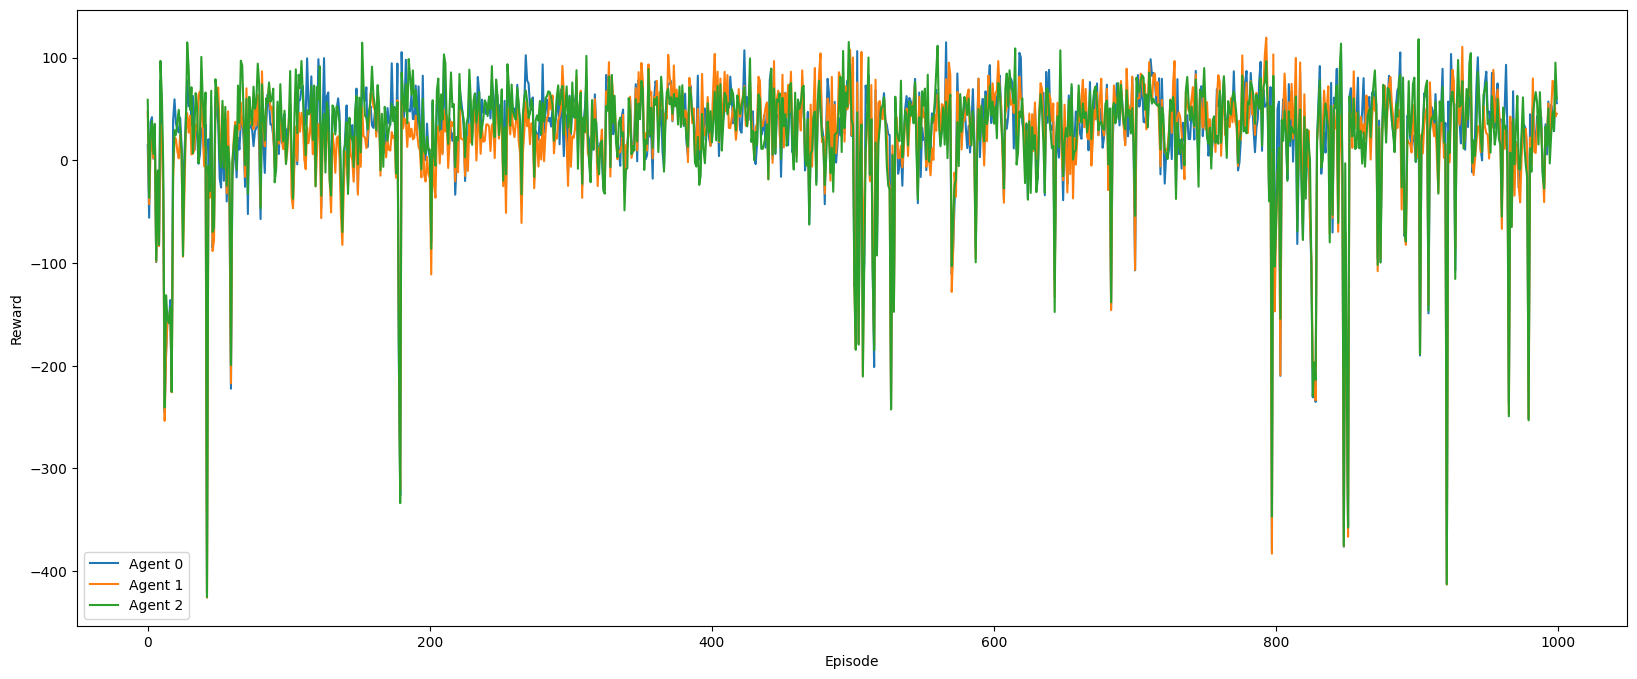

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agent_ep_summed_rewards)):
    ax.plot(agent_ep_summed_rewards[i]['Episode'], agent_ep_summed_rewards[i]['Reward'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()


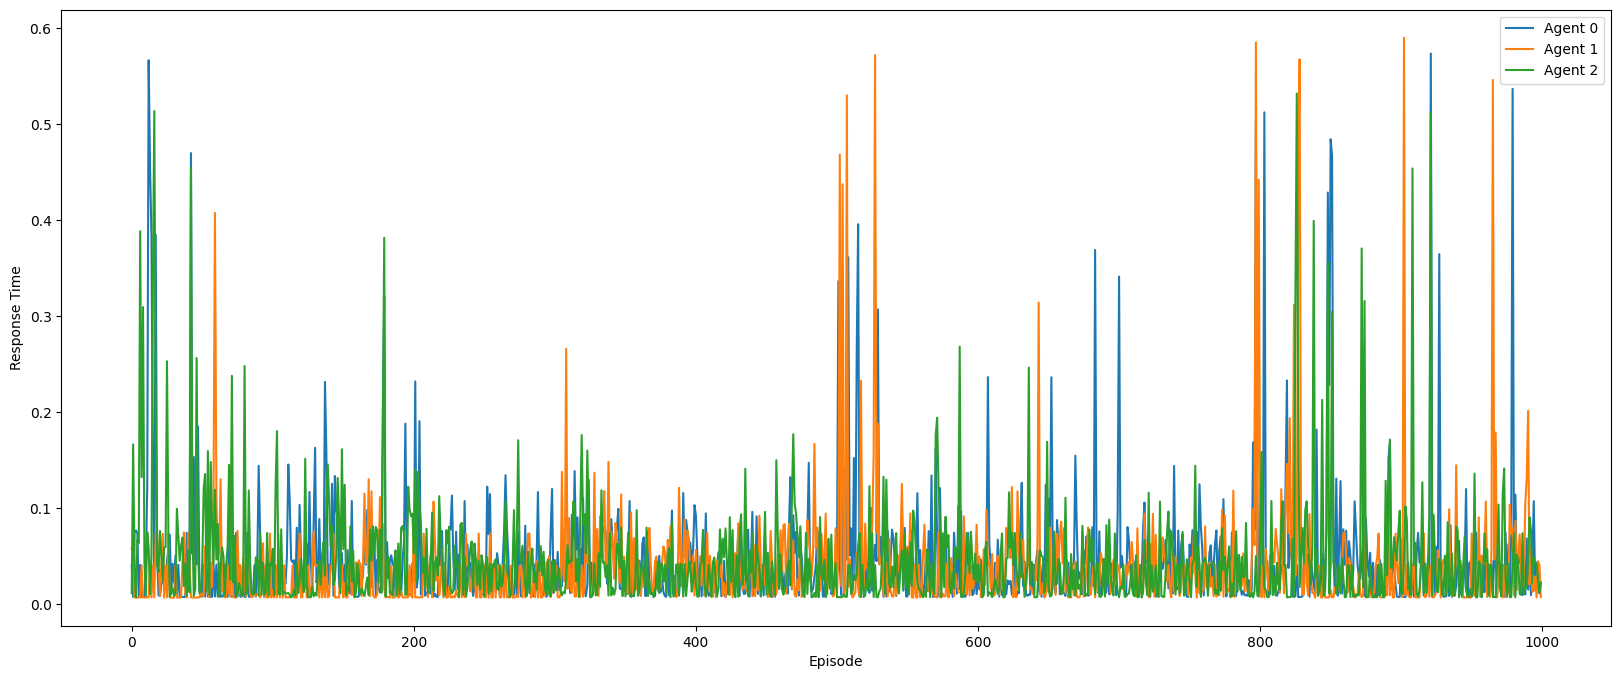

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agents_mean_latenices)):
    ax.plot(agents_mean_latenices[i]['Episode'], agents_mean_latenices[i]['Latency'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Response Time')
ax.legend()
plt.show()


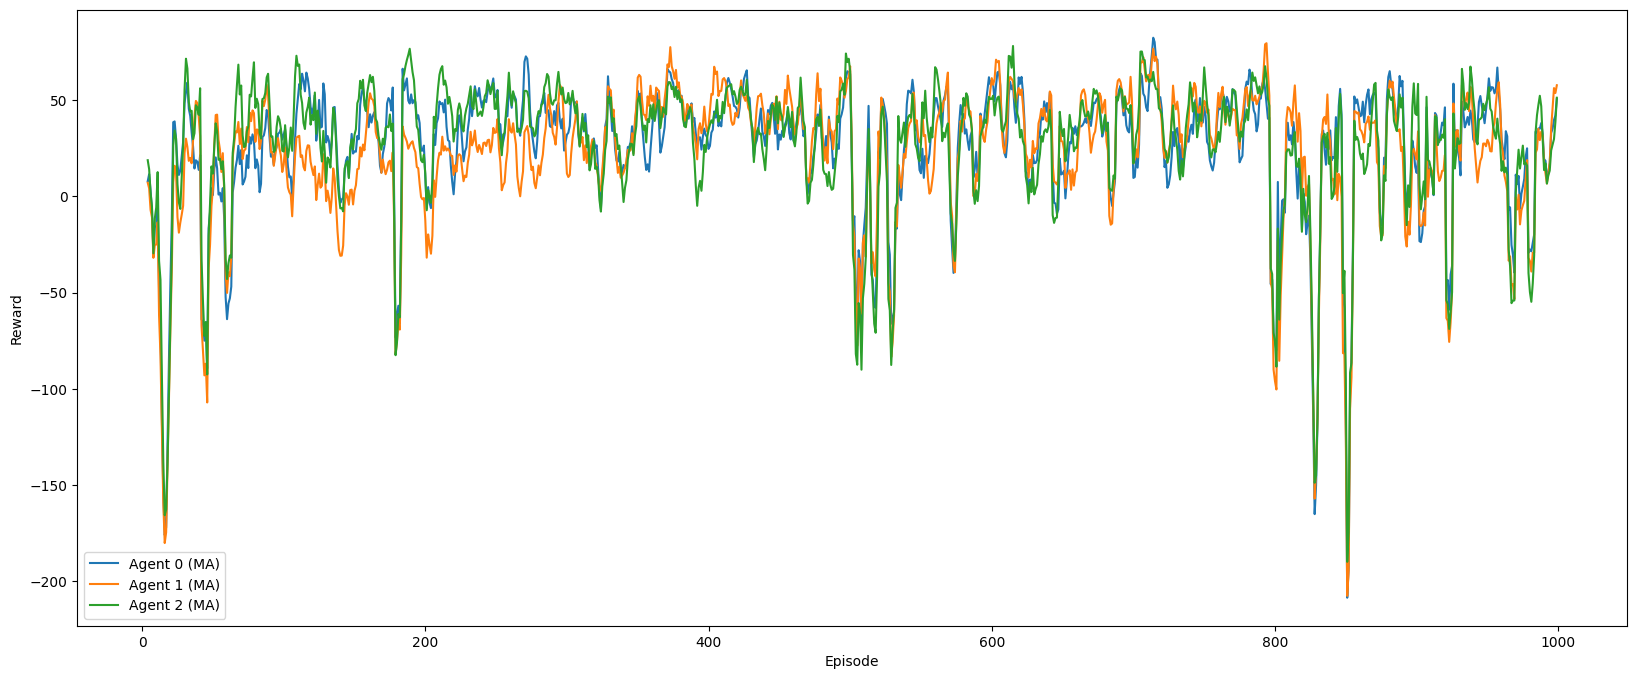

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
window_size = 5

for i in range(len(agent_ep_summed_rewards)):
    rewards_smoothed = moving_average(agent_ep_summed_rewards[i]['Reward'], window_size)
    episodes_adjusted = agent_ep_summed_rewards[i]['Episode'][window_size-1:]
    ax.plot(episodes_adjusted, rewards_smoothed, label=f'Agent {i} (MA)')

ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()

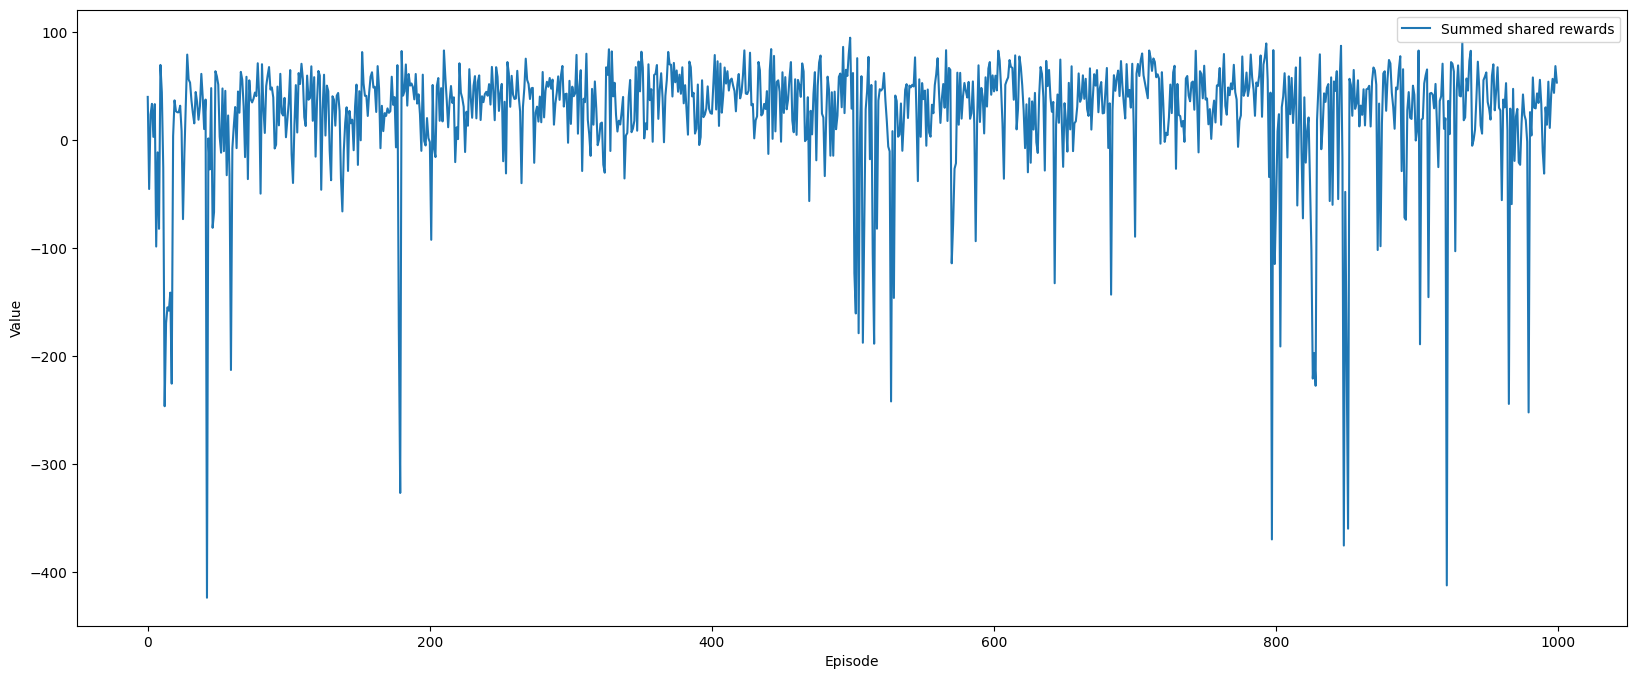

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(ep_summed_rewards_df['Reward'], label='Summed shared rewards')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()


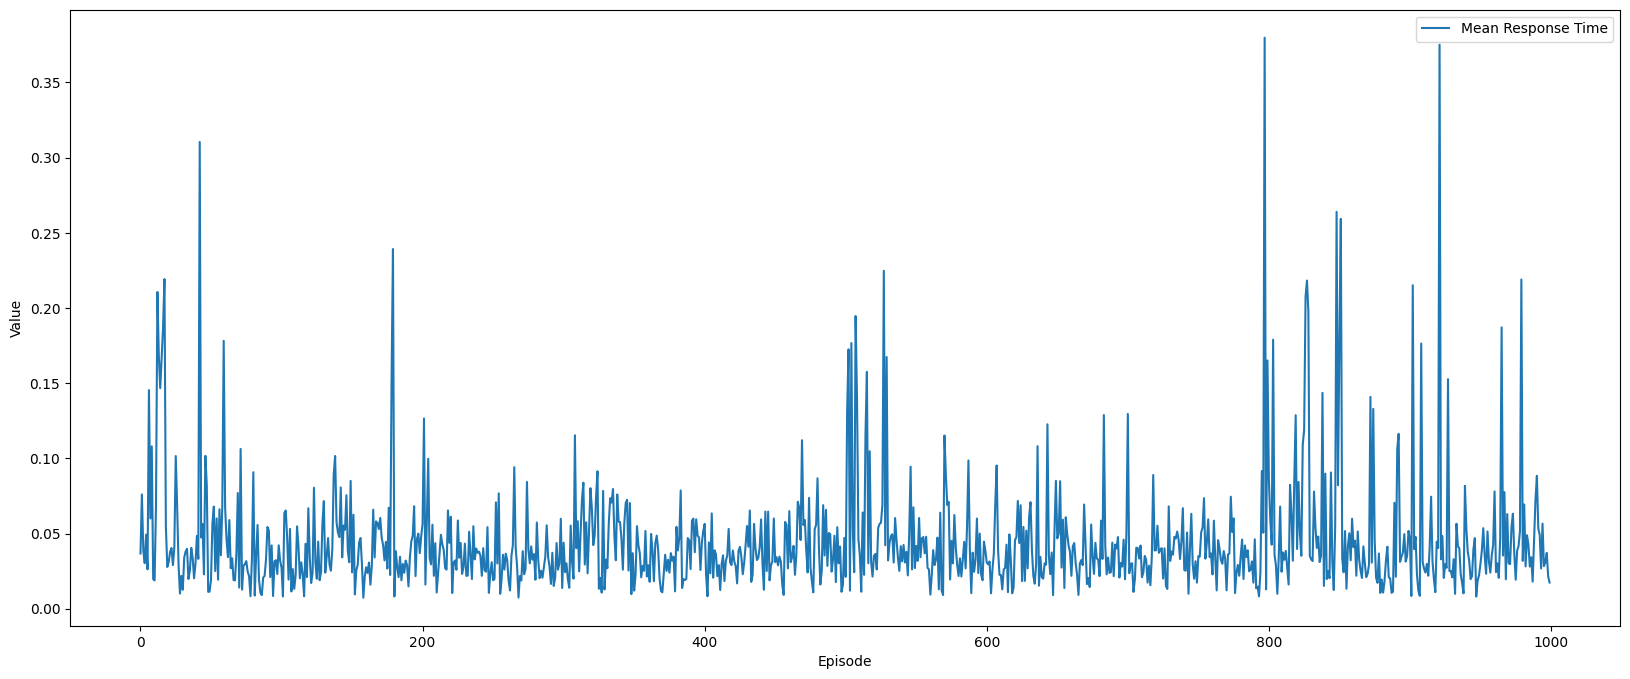

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
# ep_latencies_df_smoothed = moving_average(ep_latencies_df['Mean Latency'], window_size)
# plt.plot(ep_latencies_df_smoothed, label='Mean Latency (MA)')
plt.plot(ep_latencies_df['Mean Latency'], label='Mean Response Time')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()

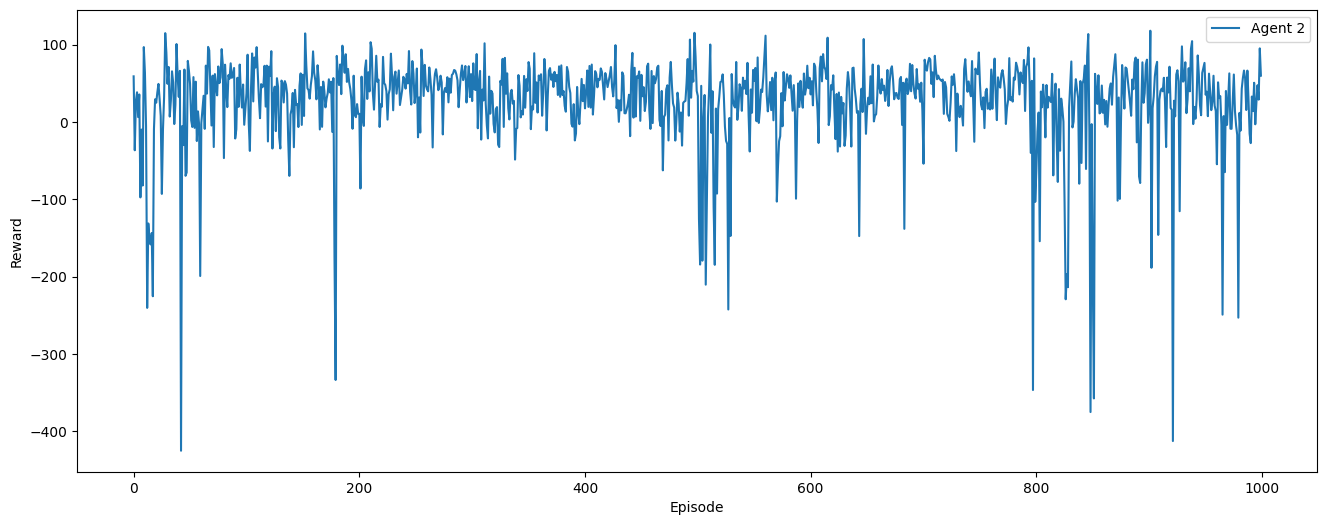

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))
# for i in range(len(agent_ep_summed_rewards)):
agent = 2
ax.plot(agent_ep_summed_rewards[agent]['Episode'], agent_ep_summed_rewards[agent]['Reward'], label=f'Agent {agent}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()
